In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from nim.models import Net, generate
from utils import count_arrival

In [4]:
net = Net.load_from_checkpoint("model.ckpt")
decoder = net.decoder
n, t = 1000, 200
x = generate(decoder, size=(n, t))
x = x.exp().numpy().reshape(n, t)

In [5]:
t, rate = count_arrival(x, 0.2, max_=50)
rate = rate.mean(axis=0)
true_rate = 0.5 * np.sin(np.pi / 6 * t) + 2

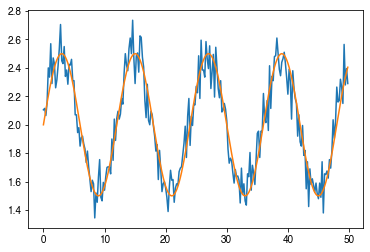

In [6]:
plt.plot(t, rate)
plt.plot(t, true_rate)